In [2]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import random

#Import your modules
#---------------------------------------

import admin_functions as adfn
import metastability as mfn

# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
F10t2 = '/Volumes/Dominic 10tb2/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

s_data = '/mnlsc/data/MCBL4/dburrows/dev'
s_code = '~/Documents/multiscale_dev_dynamics'

%load_ext autoreload
sys.version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'2.7.16 (default, Oct 10 2019, 22:02:15) \n[GCC 8.3.0]'

# Global brain states


### 6dpf

In [9]:
#Load developmental data
meta_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*eta*')
bind_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regbin*')
coord_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*labco*')
meta_l, bind_l, coord_l

(['BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_metastates.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01_metastates.npy',
  'BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01_metastates.npy',
  'BLNDEV-WILDTYPE-04_2photon_sess-01-6dpf_BLNGR_run-01_metastates.npy',
  'BLNDEV-WILDTYPE-06_2photon_sess-01-6dpf_BLNGR_run-01_metastates.npy'],
 ['BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-7dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-8dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-4dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-5dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess

In [ ]:
from sklearn.cluster import AffinityPropagation
import copy

data_list = bind_l
for i in range(len(data_list)):
    data = np.load(data_list[i])[:,1:-1].T
    name = data_list[i]

    #Empirical data
    all_clust, sub_clust = mfn.affprop(data) #cluster with affinity prop on empirical data
    emp_sim = mfn.Sim_loop(data, all_clust, sub_clust) #calculate similarity between clustered states

    #Generate null data
    rpks = np.zeros((data.shape))
    for t in range(data.shape[0]):
        temp_pks = data[t]
        np.random.shuffle(temp_pks) 
        rpks[t] = temp_pks

    null_all_clust, null_sub_clust = mfn.affprop(rpks) #cluster with affinity prop on null data
    null_sim = mfn.Sim_loop(rpks, null_all_clust, null_sub_clust) #calculate similarity between clustered states
    n_states = len(emp_sim > np.max(null_sim))
    if len(emp_sim) > n_states:
      print('null model removed a cluster')

    fin_clust = sub_clust[emp_sim > max(null_sim)] #Find the clusters that occur above chance

    np.save(Fdata + 'BLNDEV-WILDTYPE/' + name[:name.find('run')+6] + '_' +'state-labels.npy', [all_clust, sub_clust, fin_clust]) 

    print('Done' + str(i))

In [90]:
meta_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*state-labels*')
bind_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*regbin*')
coord_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*labco*')
meta_l, bind_l, coord_l

(['BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_state-labels.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01_state-labels.npy',
  'BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01_state-labels.npy',
  'BLNDEV-WILDTYPE-04_2photon_sess-01-6dpf_BLNGR_run-01_state-labels.npy',
  'BLNDEV-WILDTYPE-06_2photon_sess-01-6dpf_BLNGR_run-01_state-labels.npy'],
 ['BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-04_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-06_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy'],
 ['BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_labcoord.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01_labcoord.npy',
  'BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01_labcoord.npy',
  'BLNDEV-WILDTYPE-04_2photon_sess-

In [102]:
state_a = np.load(meta_l[0], allow_pickle=True)
bind_a = np.load(bind_l[0], allow_pickle=True)[:,1:-1]
coord_a = np.load(coord_l[0], allow_pickle=True)
state_a.shape, bind_a.shape, coord_a.shape

((3,), (16735, 4912), (16735, 5))

### Visualise state space

In [104]:
time_lab = state_a[0] #labels of each time point
unq_lab = state_a[2] #unique states 
unq_lab

array([171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 192,
       193, 194, 195, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 240, 241])

In [135]:
#Set all non_states to 0
notin = list(set(time_lab) - set(unq_lab))
rem_v=[]
for n in notin:
    rem_v = np.append(rem_v,np.where(time_lab==n)[0]).astype(int)

time_lab[rem_v] = 0

In [143]:
np.unique(time_lab, return_counts=True)

(array([  0, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
        192, 193, 194, 195, 209, 210, 211, 212, 213, 214, 215, 216, 217,
        218, 219, 220, 240, 241]),
 array([212,  79,  74, 256, 157, 223, 442,  19,  62, 513,  57,  17,  86,
        330,  70,  46, 267,  47,  65, 302,  93,  88,  71,  40,  65,  92,
        127, 767, 103,  43,  99]))

In [155]:
#Find first 3 components
from sklearn import decomposition
pca = decomposition.PCA(2)
fit = pca.fit(bind_a)
output_data = fit.components_


In [152]:
def nonlinembed(data):
    from sklearn.manifold import Isomap

    embedding = Isomap(n_components=3)
    X_transformed = embedding.fit_transform(data)
    return(X_transformed)

In [156]:
prac = nonlinembed(bind_a)

/Users/dominicburrows/Applications/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/Users/dominicburrows/Applications/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')


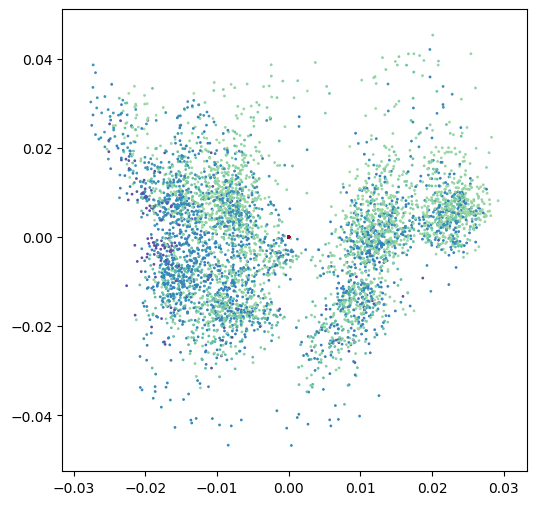

In [151]:
plt.subplots(figsize=(6,6))
plt.scatter(output_data[1], output_data[2], s = 1, c = time_lab, cmap='Spectral')
plt.show()

### Visualise neuronal activity of states

In [ ]:
state_a = np.load(meta_l[0], allow_pickle=True)
bind_a = np.load(bind_l[0], allow_pickle=True)[:,1:-1]
coord_a = np.load(coord_l[0], allow_pickle=True)
state_a.shape, bind_a.shape, coord_a.shape

In [ ]:
time_lab = state_a[0] #labels of each time point
unq_lab = state_a[2] #unique states 
unq_lab

In [ ]:
ch=0
prac_state = unq_lab[ch] #state number
curr_state = bind_a[time_lab == prac_state] #neuronal activity of current state

In [ ]:
mean_state = np.mean(curr_state, axis=)

In [ ]:
plt.subplots(figsize=(6,6))
plt.scatter(coord_a[0], coord_a[1], s = 1, c = mean_state, cmap='Spectral')
plt.show()

### Development

In [2]:
#Load developmental data
bind_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regbin*')
bind_l

['BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-7dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-8dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-4dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-5dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-03_2photon_sess-01-4dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-04_2photon_sess-01-4dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-04_2photon_sess-01-5dpf_BLNGR_run-01_regbinarised.npy',
 'BLNDEV-WILDTYPE-04_2photon_sess-01-6

In [ ]:
from sklearn.cluster import AffinityPropagation
import copy

data_list = bind_l
for i in range(len(data_list)):
    data = np.load(data_list[i])[:,1:-1].T
    name = data_list[i]

    #Empirical data
    all_clust, sub_clust = mfn.affprop(data) #cluster with affinity prop on empirical data
    emp_sim = mfn.Sim_loop(data, all_clust, sub_clust) #calculate similarity between clustered states

    #Generate null data
    rpks = np.zeros((data.shape))
    for t in range(data.shape[0]):
        temp_pks = data[t]
        np.random.shuffle(temp_pks) 
        rpks[t] = temp_pks

    null_all_clust, null_sub_clust = mfn.affprop(rpks) #cluster with affinity prop on null data
    null_sim = mfn.Sim_loop(rpks, null_all_clust, null_sub_clust) #calculate similarity between clustered states
    n_states = len(emp_sim > np.max(null_sim))
    if len(emp_sim) > n_states:
      print('null model removed a cluster')

    fin_clust = sub_clust[emp_sim > max(null_sim)] #Find the clusters that occur above chance
    p_state, m_dwell, v_dwell = mfn.state_stats(fin_clust, all_clust) #Calculate state transition statistics
    null_m_dwell = mfn.null_states(fin_clust, data) #Calculate the mean dwell time with random dynamics
    np.save(Fdata + 'BLNDEV-WILDTYPE/' + name[:name.find('run')+6] + '_' +'metastates.npy', [n_states, p_state, m_dwell, null_m_dwell, v_dwell]) 

    print('Done' + str(i))

In [67]:
#Load developmental data
meta_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*meta*')

In [63]:
#How many brain states
ch = 0
data_l, lab_l = [],[]
#
for x,lab in enumerate(label_v):
    data_l = np.append(data_l,[np.load(dpf_l[x][i], allow_pickle=True)[ch] for i in range(len(dpf_l[x]))])
    lab_l = np.append(lab_l, np.repeat(label_v[x], len(dpf_l[x])))
df = pd.DataFrame({'data': data_l, 'label': lab_l})


In [64]:
df

,data,label
0,15.0,3.0
1,15.0,3.0
2,7.0,3.0
3,20.0,3.0
4,12.0,3.0
5,14.0,4.0
6,10.0,4.0
7,18.0,4.0
8,42.0,4.0
9,29.0,4.0


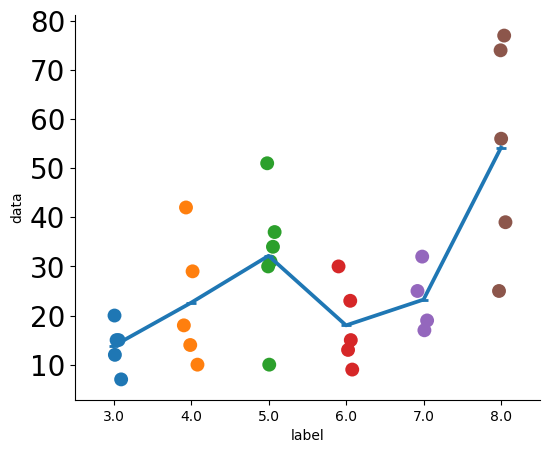

In [65]:
import seaborn as sns
from matplotlib.collections import PathCollection

dic = df
data_name = 'number of states'

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="label", y='data', data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="label", y='data', data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [66]:
from scipy import stats
stats.pearsonr(dic['data'], dic['label'])

(0.536261772969854, 0.0022529672786245577)

In [68]:
#How many brain states
ch = 3
data_l, lab_l = [],[]
#
for x,lab in enumerate(label_v):
    data_l = np.append(data_l,[np.load(dpf_l[x][i], allow_pickle=True)[ch] for i in range(len(dpf_l[x]))])
    lab_l = np.append(lab_l, np.repeat(label_v[x], len(dpf_l[x])))
df = pd.DataFrame({'data': data_l, 'label': lab_l})


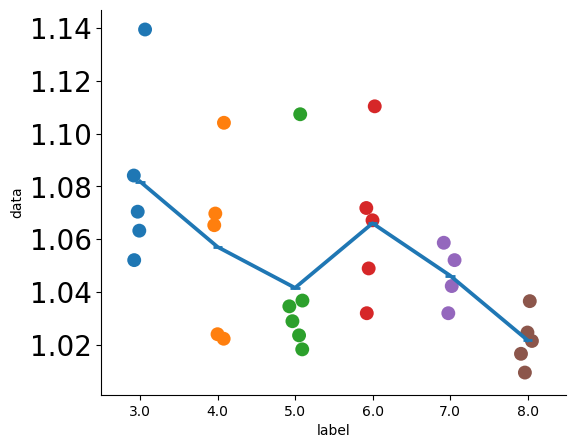

In [70]:
import seaborn as sns
from matplotlib.collections import PathCollection

dic = df
data_name = 'number of states'

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="label", y='data', data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="label", y='data', data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [71]:
from scipy import stats
stats.pearsonr(dic['data'], dic['label'])

(-0.47282931152549623, 0.008323247877378015)

In [106]:
dff_l[:3], trace_l[:3],bind_l[:3]

(['BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_regdeltaff.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regdeltaff.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_regdeltaff.npy'],
 ['BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_regtrace.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regtrace.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_regtrace.npy'],
 ['BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regbinarised.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_regbinarised.npy'])

In [107]:
dff_l[1], trace_l[1],bind_l[1]

('BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regdeltaff.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regtrace.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regbinarised.npy')

In [108]:
delt = np.load(dff_l[1])
trace = np.load(trace_l[1])
bind = np.load(bind_l[1])


In [109]:
delt.shape, trace.shape,bind.shape

((14559, 4914), (14559, 4914), (14559, 4914))

In [104]:
delt.shape, trace.shape,bind.shape

((14559, 4914), (24477, 5733), (14559, 4914))

In [73]:
trace_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*realtr*')
trace_l

['BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-7dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-01_2photon_sess-01-8dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-4dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-5dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-03_2photon_sess-01-4dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-04_2photon_sess-01-4dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-04_2photon_sess-01-5dpf_BLNGR_run-01_realtrace.npy',
 'BLNDEV-WILDTYPE-04_2photon_sess-01-6dpf_BLNGR_run-01_realtrace.npy',
 'BLND

In [75]:
pr = np.load(trace_l[10])
pr[0]

array([ 8.81966171e+01, -4.00752097e-01,  5.54569397e+02, ...,
        3.08084412e+02, -2.74841642e+00,  1.22249886e+02], dtype=float32)

In [80]:
pr[4]

array([894.4754 ,  28.37283, 357.13254, ..., 101.30086, 235.58951,
       362.80646], dtype=float32)

In [68]:
pr = np.load(trace_l[0])
pr

array([[-4.4608583e+00,  4.3878751e+00,  6.4941992e+02, ...,
         3.8592245e+02,  2.4746797e+02,  1.7691220e+02],
       [ 1.5892515e+03,  7.5515784e+02,  1.3111333e+03, ...,
         2.9942767e+02,  1.6652362e+02,  4.0347443e+02],
       [ 2.1465468e+02,  2.1866428e+03,  1.2086118e+03, ...,
        -4.6677473e-01,  1.5798528e+02,  7.7582306e-01],
       ...,
       [ 2.4637550e-01, -6.7999029e-01, -1.0938400e+01, ...,
         1.1824801e+01, -5.0566750e+00,  1.6300457e+01],
       [-1.5456740e+00, -6.8531208e+00, -1.8173116e+00, ...,
         8.5742416e+00,  1.1901367e+00,  7.8926697e+00],
       [ 2.5418372e+00,  7.3278384e+00,  3.3624290e+01, ...,
         1.3673939e+01,  2.4071004e+00,  6.9960542e+00]], dtype=float32)